<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/Classification_Compare_AllclassificationModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Compare All Classification Algorithms

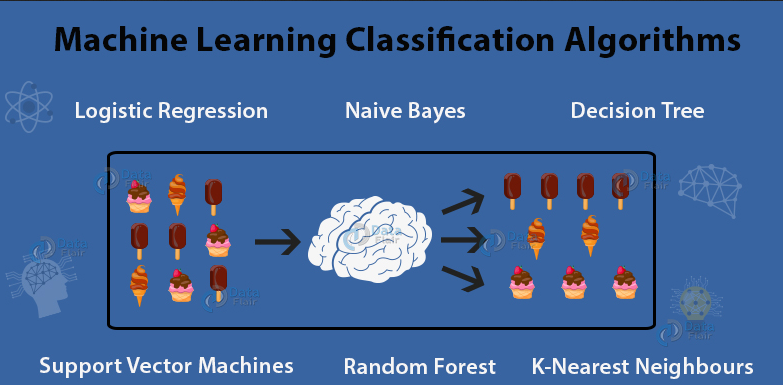

1. Logostic Regression

2. K-Nearest Neighbors

3. Support Vector Machine

4. Naive Bayes Classification

5. Decision Tree Algorithm


    1. Clean and balance data using SMOTE.
    2. Create Pipeline
    3. Get Best Fitting Algorithm
    4. Tun parameters for best fitted algorithm and improve performance.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

#import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



##Define Functions

In [4]:
models={"Logistic Regression":LogisticRegression(),
        "Decision Tree":DecisionTreeClassifier(),
        "Naive Bayes":GaussianNB(),
        "SVM":SVC(),
        "KNN":KNeighborsClassifier()
        }

In [5]:
def find_best_model(x,y,flag):
  xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
  acc={}
  for name,model in models.items():
    #create pipeline
    if flag==0:
      model=Pipeline([(name,model)])
    elif flag==1:
      model=Pipeline([("scaler",StandardScaler()),
                      (name,model)])
      
    #fit model
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    accuracy=accuracy_score(ytest,ypred)
    print("Accuracy for ",name," is - ",accuracy)
    acc[name]=accuracy

  return acc



In [6]:
def best_acc(acc):
  high=0
  model=""
  for name,acc in acc.items():
    if high < acc:
      high = acc
      model=name

  print(model," is giving highest accuracy = ", high)

In [14]:
df = pd.read_excel('/content/State of Indias Birds - Essentials.xlsx',index_col='Serial Number')
df.head()

,Common Name (India Checklist),Scientific Name (India Checklist),IUCN Status,WLPA Schedule,Analysed Long-term,Analysed Current,Long-term Trend (%),Long-term Trend CI (%),Current Annual Change (%),Current Annual Change CI (%),"Distribution Range Size (units of 10,000 sq. km.)","Distribution Range Size CI (units of 10,000 sq. km.)",Long Term Status,Current Status,Distribution Status,Status of Conservation Concern,Assessed Primarily Based On,Migratory Status
Serial Number,,,,,,,,,,,,,,,,,,
1,Fulvous Whistling Duck,Dendrocygna bicolor,Least Concern,Schedule-I,NaN,X,NaN,NaN,-1.873458,11.421401,13.407499,0.0711,Data Deficient,Uncertain,Moderate,Low,Trends & Range Size,Resident
2,Lesser Whistling Duck,Dendrocygna javanica,Least Concern,Schedule-IV,X,X,4.607645,19.496768,-3.907999,2.727740,149.898761,0.0987,Stable,Moderate Decline,Very Large,Low,Trends & Range Size,Resident
3,Bar-headed Goose,Anser indicus,Least Concern,Schedule-IV,X,X,-13.399940,217.658129,-6.935407,38.946950,45.447258,0.0700,Uncertain,Uncertain,Large,Low,Trends & Range Size,Migratory-Local
4,Greylag Goose,Anser anser,Least Concern,Schedule-IV,X,X,-38.402762,34.943843,-3.091665,8.853505,24.569174,0.1045,Uncertain,Uncertain,Moderate,Low,Trends & Range Size,Migratory-Long-Distance
5,Comb Duck,Sarkidiornis melanotos,Least Concern,Schedule-IV,X,X,1.291713,31.154296,-6.018774,4.432597,81.233442,0.0836,Uncertain,Moderate Decline,Large,Moderate,Trends & Range Size,Resident


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 867 entries, 1 to 867
Data columns (total 18 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Common Name (India Checklist)                         867 non-null    object 
 1   Scientific Name (India Checklist)                     867 non-null    object 
 2   IUCN Status                                           867 non-null    object 
 3   WLPA Schedule                                         867 non-null    object 
 4   Analysed Long-term                                    485 non-null    object 
 5   Analysed Current                                      675 non-null    object 
 6   Long-term Trend (%)                                   487 non-null    float64
 7   Long-term Trend CI (%)                                487 non-null    float64
 8   Current Annual Change (%)                             677 no

In [16]:
df.isna().sum()

Common Name (India Checklist)                             0
Scientific Name (India Checklist)                         0
IUCN Status                                               0
WLPA Schedule                                             0
Analysed Long-term                                      382
Analysed Current                                        192
Long-term Trend (%)                                     380
Long-term Trend CI (%)                                  380
Current Annual Change (%)                               190
Current Annual Change CI (%)                            190
Distribution Range Size (units of 10,000 sq. km.)        11
Distribution Range Size CI (units of 10,000 sq. km.)     11
Long Term Status                                          5
Current Status                                            5
Distribution Status                                       5
Status of Conservation Concern                            5
Assessed Primarily Based On             

In [17]:
df.columns

Index(['Common Name (India Checklist)', 'Scientific Name (India Checklist)',
       'IUCN Status', 'WLPA Schedule', 'Analysed Long-term',
       'Analysed Current', 'Long-term Trend (%)', 'Long-term Trend CI (%)',
       'Current Annual Change (%)', 'Current Annual Change CI (%)',
       'Distribution Range Size (units of 10,000 sq. km.)',
       'Distribution Range Size CI (units of 10,000 sq. km.)',
       'Long Term Status', 'Current Status', 'Distribution Status',
       'Status of Conservation Concern', 'Assessed Primarily Based On',
       'Migratory Status'],
      dtype='object')

In [18]:
#fillna using mode
#same value X in whole column will not show any effect on labels
df=df.drop(columns=['Analysed Current','Analysed Long-term'])

df['Long-term Trend (%)']=df['Long-term Trend (%)'].fillna(df['Long-term Trend (%)'].median())
df['Long-term Trend CI (%)']=df['Long-term Trend CI (%)'].fillna(df['Long-term Trend CI (%)'].median())
df['Current Annual Change (%)']=df['Current Annual Change (%)'].fillna(df['Current Annual Change (%)'].median())
df['Current Annual Change CI (%)']=df['Current Annual Change CI (%)'].fillna(df['Current Annual Change CI (%)'].median())
df['Distribution Range Size (units of 10,000 sq. km.)']=df['Distribution Range Size (units of 10,000 sq. km.)'].fillna(df['Distribution Range Size (units of 10,000 sq. km.)'].median())
df['Distribution Range Size CI (units of 10,000 sq. km.)']=df['Distribution Range Size CI (units of 10,000 sq. km.)'].fillna(df['Distribution Range Size CI (units of 10,000 sq. km.)'].median())

df['Long Term Status']=df['Long Term Status'].fillna(df['Long Term Status'].mode())
df['Current Status']=df['Current Status'].fillna(df['Current Status'].mode())
df['Distribution Status']=df['Distribution Status'].fillna(df['Distribution Status'].mode())
df['Status of Conservation Concern']=df['Status of Conservation Concern'].fillna(df['Status of Conservation Concern'].mode())
df['Assessed Primarily Based On']=df['Assessed Primarily Based On'].fillna(df['Assessed Primarily Based On'].mode())


df.isna().sum()

Common Name (India Checklist)                           0
Scientific Name (India Checklist)                       0
IUCN Status                                             0
WLPA Schedule                                           0
Long-term Trend (%)                                     0
Long-term Trend CI (%)                                  0
Current Annual Change (%)                               0
Current Annual Change CI (%)                            0
Distribution Range Size (units of 10,000 sq. km.)       0
Distribution Range Size CI (units of 10,000 sq. km.)    0
Long Term Status                                        5
Current Status                                          5
Distribution Status                                     5
Status of Conservation Concern                          5
Assessed Primarily Based On                             1
Migratory Status                                        0
dtype: int64

In [19]:
df=df.dropna()
df.isna().sum()

Common Name (India Checklist)                           0
Scientific Name (India Checklist)                       0
IUCN Status                                             0
WLPA Schedule                                           0
Long-term Trend (%)                                     0
Long-term Trend CI (%)                                  0
Current Annual Change (%)                               0
Current Annual Change CI (%)                            0
Distribution Range Size (units of 10,000 sq. km.)       0
Distribution Range Size CI (units of 10,000 sq. km.)    0
Long Term Status                                        0
Current Status                                          0
Distribution Status                                     0
Status of Conservation Concern                          0
Assessed Primarily Based On                             0
Migratory Status                                        0
dtype: int64

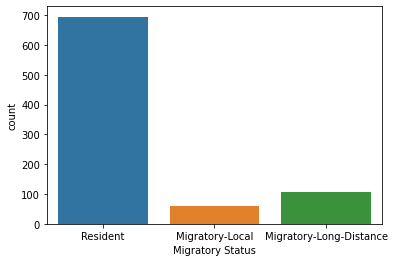

In [20]:
sns.countplot(data=df, x=df['Migratory Status'])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


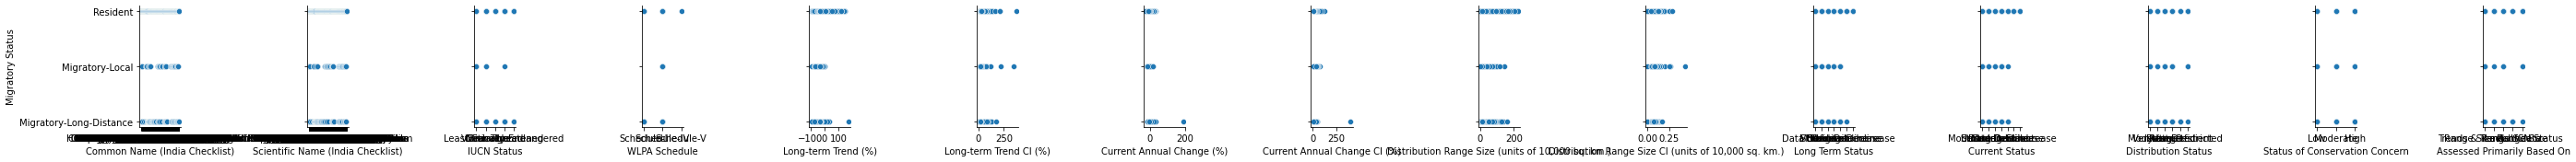

In [22]:
sns.pairplot(data=df,x_vars=['Common Name (India Checklist)', 'Scientific Name (India Checklist)',
       'IUCN Status', 'WLPA Schedule',
       'Long-term Trend (%)', 'Long-term Trend CI (%)',
       'Current Annual Change (%)', 'Current Annual Change CI (%)',
       'Distribution Range Size (units of 10,000 sq. km.)',
       'Distribution Range Size CI (units of 10,000 sq. km.)',
       'Long Term Status', 'Current Status', 'Distribution Status',
       'Status of Conservation Concern', 'Assessed Primarily Based On'],y_vars='Migratory Status')

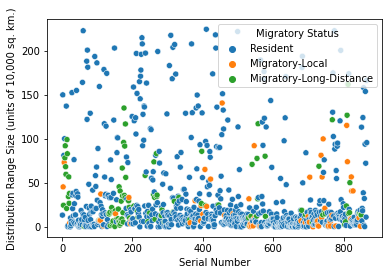

In [37]:
sns.scatterplot(data=df, y='Distribution Range Size (units of 10,000 sq. km.)',x=df.index,hue='Migratory Status')

In [39]:
df['Migratory Status'].unique()

array(['Resident', 'Migratory-Local', 'Migratory-Long-Distance'],
      dtype=object)

In [40]:
#encoding categorised columns
le=LabelEncoder()

df['IUCN Status']=le.fit_transform(df['IUCN Status'])
df['WLPA Schedule']=le.fit_transform(df['WLPA Schedule'])
df['Long Term Status']=le.fit_transform(df['Long Term Status'])
df['Long Term Status']=le.fit_transform(df['Long Term Status'])
df['Current Status']=le.fit_transform(df['Current Status'])
df['Distribution Status']=le.fit_transform(df['Distribution Status'])
df['Status of Conservation Concern']=le.fit_transform(df['Status of Conservation Concern'])
df['Assessed Primarily Based On']=le.fit_transform(df['Assessed Primarily Based On'])
df['Migratory Status']=df['Migratory Status'].map({'Resident':0, 'Migratory-Local':1, 'Migratory-Long-Distance':2})


In [41]:
df.head()

,Common Name (India Checklist),Scientific Name (India Checklist),IUCN Status,WLPA Schedule,Long-term Trend (%),Long-term Trend CI (%),Current Annual Change (%),Current Annual Change CI (%),"Distribution Range Size (units of 10,000 sq. km.)","Distribution Range Size CI (units of 10,000 sq. km.)",Long Term Status,Current Status,Distribution Status,Status of Conservation Concern,Assessed Primarily Based On,Migratory Status
Serial Number,,,,,,,,,,,,,,,,
1,Fulvous Whistling Duck,Dendrocygna bicolor,2,0,-30.045127,26.164983,-1.873458,11.421401,13.407499,0.0711,0,6,2,1,4,0
2,Lesser Whistling Duck,Dendrocygna javanica,2,1,4.607645,19.496768,-3.907999,2.727740,149.898761,0.0987,3,1,4,1,4,0
3,Bar-headed Goose,Anser indicus,2,1,-13.399940,217.658129,-6.935407,38.946950,45.447258,0.0700,6,6,1,1,4,1
4,Greylag Goose,Anser anser,2,1,-38.402762,34.943843,-3.091665,8.853505,24.569174,0.1045,6,6,2,1,4,2
5,Comb Duck,Sarkidiornis melanotos,2,1,1.291713,31.154296,-6.018774,4.432597,81.233442,0.0836,6,1,1,2,4,0


In [50]:
x=df.iloc[:,2:-1]
y=df.iloc[:,-1]

##oversampling unbalanced data using SMOTE

Class=0, n=695 (33.33333333333333.3f%%)
Class=1, n=695 (33.33333333333333.3f%%)
Class=2, n=695 (33.33333333333333.3f%%)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


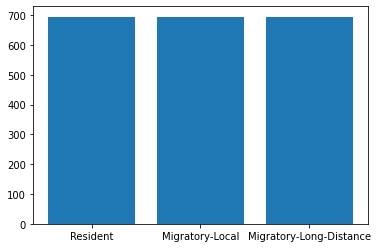

In [51]:
oversample = SMOTE()
X, y = oversample.fit_resample(x, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class={}, n={} ({}.3f%%)'.format(k, v, per))
# plot the distribution
plt.bar(x=['Resident', 'Migratory-Local', 'Migratory-Long-Distance'],height= counter.values())
plt.show()

Conclusion :

    Now data is cleaned well and ready to use.

##Train data and get best fitting model

In [53]:
acc=find_best_model(X,y,0)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy for  Logistic Regression  is -  0.5491606714628298
Accuracy for  Decision Tree  is -  0.8369304556354916
Accuracy for  Naive Bayes  is -  0.4556354916067146
Accuracy for  SVM  is -  0.5419664268585132
Accuracy for  KNN  is -  0.8273381294964028


In [54]:
best_acc(acc)

Decision Tree  is giving highest accuracy =  0.8369304556354916


Conclusion :

    We got Decision Tree Algorithm as best performing for out data.
    Decision Tree  is giving highest accuracy =  0.8369304556354916


##Tunning parameters for Best Fitted model

In [56]:
#help(DecisionTreeClassifier)
#estimators
model=DecisionTreeClassifier()

#params
params={"criterion":["gini", "entropy"],
        "splitter":["best", "random"],
        "max_features":["auto", "sqrt", "log2"]}

#cross validator
kfold=RepeatedStratifiedKFold(n_splits=5, n_repeats=10,random_state=1)

In [57]:
grid_cv=GridSearchCV(estimator=model,param_grid=params,cv=kfold,scoring='accuracy')
result=grid_cv.fit(X,y)

In [58]:
print(result.best_score_)
print(result.best_params_)

0.8224460431654677
{'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}


In [61]:
#Bulid model and fit

model=DecisionTreeClassifier(criterion= 'entropy', max_features= 'auto', splitter= 'best')
model.fit(X,y)
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

ypred=model.predict(xtest)

Accuracy Score : 1.0
Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       142
           2       1.00      1.00      1.00       143

    accuracy                           1.00       417
   macro avg       1.00      1.00      1.00       417
weighted avg       1.00      1.00      1.00       417



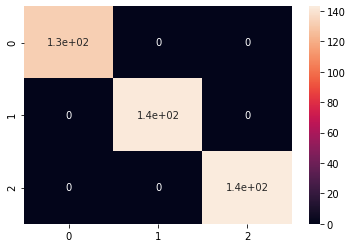

In [62]:
print("Accuracy Score :",accuracy_score(ytest,ypred))
print("Classification Report :",classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

Conclusion :

    After balancing information of each class in data it can be conclude that,
    Decision Tree Algorithm is working best for such kind of data including both continuous and categorical features.